In [1]:

!pip install kaggle==1.5.12

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [3]:
!kaggle datasets download -d salader/dogs-vs-cats --force


100% 1.06G/1.06G [00:10<00:00, 227MB/s]
100% 1.06G/1.06G [00:10<00:00, 110MB/s]


In [4]:
!pip install tensorflow


In [5]:
import os

file_path = '/content/dogs-vs-cats.zip'
print("File exists:", os.path.exists(file_path))
print("File size (MB):", os.path.getsize(file_path) / 1024 / 1024)


File exists: True
File size (MB): 1089.946455001831


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import  tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [20]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
class_names = train_ds.class_names


validation_ds = keras.utils.image_dataset_from_directory(
 directory =  '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
import matplotlib.pyplot as plt

# Step 1: Get the first batch from the dataset
for images, labels in train_ds.take(1):
    # Step 2: Get the first image and its label
    image = images[3]
    label = labels[3]
    print("Name:" ,class_names[label])
    print("label:", label.numpy())



Name: dogs
label: 1


In [10]:
#Normaloze
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(256, 256, 3)))  # 👈 Use Input layer

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))



model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history =model.fit(train_ds, validation_data=validation_ds, epochs=30, callbacks=[early_stop])


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.5935 - loss: 1.6271 - val_accuracy: 0.7122 - val_loss: 0.5964
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.7270 - loss: 0.5708 - val_accuracy: 0.7310 - val_loss: 0.5693
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.7748 - loss: 0.4721 - val_accuracy: 0.6798 - val_loss: 0.6728
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8187 - loss: 0.4077 - val_accuracy: 0.7558 - val_loss: 0.5342
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8499 - loss: 0.3441 - val_accuracy: 0.7854 - val_loss: 0.5186
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8951 - loss: 0.2520 - val_accuracy: 0.7996 - val_loss: 0.6229
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9266 - loss: 0.1846 - val_accuracy: 0.7894 - val_loss: 0.6024
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.9575 - loss: 0.1136 - 

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = train_ds.class_names  # Get class names like ['cats', 'dogs']
# Get the first batch
for images, labels in train_ds.take(1):
    image = images[4]
    label = labels[4]
    img_batch = tf.expand_dims(image, axis=0)

    # Predict
    prediction = model.predict(img_batch)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]

    # Also print to console
    print("True Label Index:", label.numpy())
    print("Predicted Label Index:", predicted_class)
    print("Predicted Label Name:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
True Label Index: 0
Predicted Label Index: 0
Predicted Label Name: cats


In [22]:

# Evaluate on test data
loss, accuracy = model.evaluate(validation_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6349 - loss: 133.3011
Test Accuracy: 63.76%


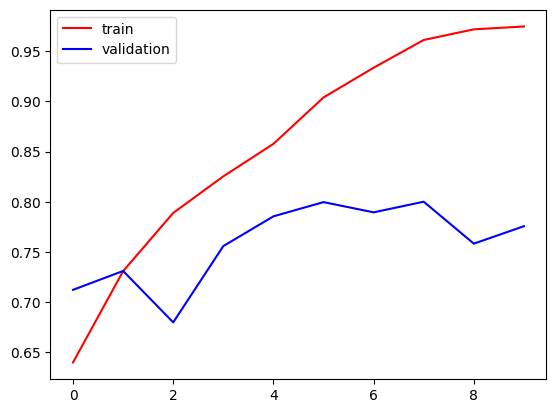

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

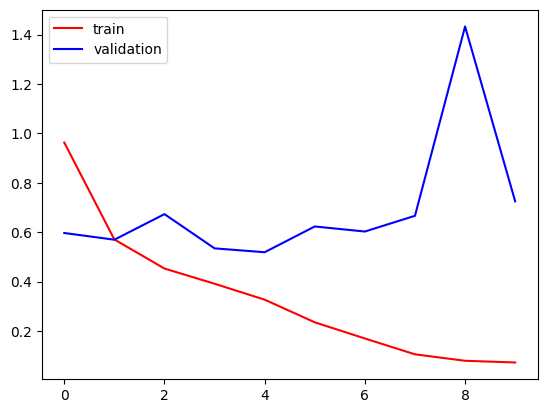

In [24]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()